In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [4]:
df.shape

(1465, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df.duplicated().sum()

0

In [7]:
# List of columns to convert
num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Clean and convert numeric columns
for col in num_cols:
    df[col] = df[col].astype(str)  # Ensure all data is treated as string first
    df[col] = df[col].str.replace('₹', '', regex=False)    # Remove ₹
    df[col] = df[col].str.replace(',', '', regex=False)    # Remove commas
    df[col] = df[col].str.replace('%', '', regex=False)    # Remove %
    df[col] = df[col].str.strip()                          # Remove leading/trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')      # Convert to numeric

# Check the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [8]:
df.drop(['img_link', 'product_link', 'user_name', 'product_id', 'user_id', 'review_id'],axis = 1, inplace = True, errors = 'coerce')

In [9]:
df.sample(5)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
240,Ambrane 60W / 3A Fast Charging Output Cable wi...,Computers&Accessories|Accessories&Peripherals|...,179.0,399.0,55,4.0,1423.0,Fast Charging Cable - The cable can support up...,"GOOD,Thank you Amazon very good charging cabl...","Everything is fine but it is bulky and hard, i..."
735,STRIFF 12 Pieces Highly Flexible Silicone Micr...,Electronics|Mobiles&Accessories|MobileAccessor...,95.0,499.0,81,4.2,1949.0,Protect cables: the cable protectors are desig...,"Very useful,Very useful item to make your phon...",A 10bucks piece can save cable worth hundreds....
1253,INALSA Electric Chopper Bullet- 400 Watts with...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,1656.0,2695.0,39,4.4,6027.0,Reduce Prep Time: Inalsa Bullet is one powerfu...,"A must have addition to the kitchen.,Easy to u...",After about a month of usage this is an over a...
1345,"Prestige PWG 07 Wet Grinder, 2L (Multicolor) w...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,3710.0,4330.0,14,3.7,1662.0,"2 Litres Capacity, 5 Years Warranty on Motor|H...","Good,Ease of use,Ok,Very good,Grinding is fine...","Can buy it,its really a good product for the p..."
954,Gizga Essentials Laptop Bag Sleeve Case Cover ...,Computers&Accessories|Accessories&Peripherals|...,269.0,1099.0,76,4.1,1092.0,Innovative Design: This Laptop Case is made of...,"Nice product,Not bad,good sleev,Very Good Prod...","Nice product,Not bad..,Its a good sleev for 14..."


In [10]:
# Extract primary category if multiple levels exist
df['main_category'] = df['category'].str.split('|').str[0]

df.isnull().sum()

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
review_title           0
review_content         0
main_category          0
dtype: int64

In [11]:
df = df.fillna(0)

In [12]:
df.sample(5)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,main_category
486,FLiX (Beetel) USB to Type C PVC Data Sync & 2A...,Computers&Accessories|Accessories&Peripherals|...,139.0,249.0,44,4.0,9377.0,Durable Pvc Outer Exterior: Pvc Cables Are Ver...,"Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,Computers&Accessories
939,Wecool Moonwalk M1 ENC True Wireless in Ear Ea...,"Electronics|Headphones,Earbuds&Accessories|Hea...",889.0,1999.0,56,4.2,2284.0,We have designed the ENC earbuds to provide Ex...,"Great Customer care experience..!!,Best in bud...",I ordered this product 1 week ago on Amazon bu...,Electronics
307,ZORBES® Wall Adapter Holder for Alexa Echo Dot...,"Electronics|HomeTheater,TV&Video|Accessories|T...",893.0,1052.0,15,4.3,106.0,[Make Your Wired Alexa Echo Dot Looks Wireless...,Concept is great but not at all value for mone...,",If you have brain,its very easy to install an...",Electronics
748,JBL Commercial CSLM20B Auxiliary Omnidirection...,Computers&Accessories|Accessories&Peripherals|...,949.0,2000.0,53,3.9,14969.0,Omnidirectional pickup pattern|3.5mm TRRS jack...,"It's just good !,Good for WFH,Works according ...",It just good for beginners you can start your ...,Computers&Accessories
967,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",5299.0,6355.0,17,3.9,8280.0,Printer type: Ink Efficient; Functionality All...,"Good printer but challenging setup,Use friendl...",The Printer is compact and gets the job done. ...,Computers&Accessories


In [13]:
df.drop('category', axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   int64  
 4   rating               1465 non-null   float64
 5   rating_count         1465 non-null   float64
 6   about_product        1465 non-null   object 
 7   review_title         1465 non-null   object 
 8   review_content       1465 non-null   object 
 9   main_category        1465 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 114.6+ KB


In [15]:
df.rename(columns={'main_category': 'category'}, inplace=True)

In [16]:
df.head()

,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,category
0,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories
2,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories


#### Q1) What is the average rating for each product category ?

In [17]:
Avg_rating = df.groupby('category')['rating'].mean().reset_index()
Avg_rating = Avg_rating.sort_values(by = 'rating', ascending = False) #sorting values
print(Avg_rating)

                category    rating
7         OfficeProducts  4.309677
8             Toys&Games  4.300000
5        HomeImprovement  4.250000
1  Computers&Accessories  4.154967
2            Electronics  4.081749
4           Home&Kitchen  4.031696
3    Health&PersonalCare  4.000000
6     MusicalInstruments  3.900000
0          Car&Motorbike  3.800000


#### Q2) What are the top rating_count products by category ?

In [18]:
# Find the top product per category based on rating_count
top_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]

# Sort by rating_count and select top 6
top_6_products = top_by_category.sort_values(by='rating_count', ascending=False).head(6)

# Display the result
print(top_6_products[['category', 'rating_count']])

                   category  rating_count
12              Electronics      426973.0
1028           Home&Kitchen      270563.0
588   Computers&Accessories      253105.0
613      MusicalInstruments       68664.0
924              Toys&Games       15867.0
659          OfficeProducts       12179.0


#### Q3) What is the distribution of discounted prices vs. actual prices ? 

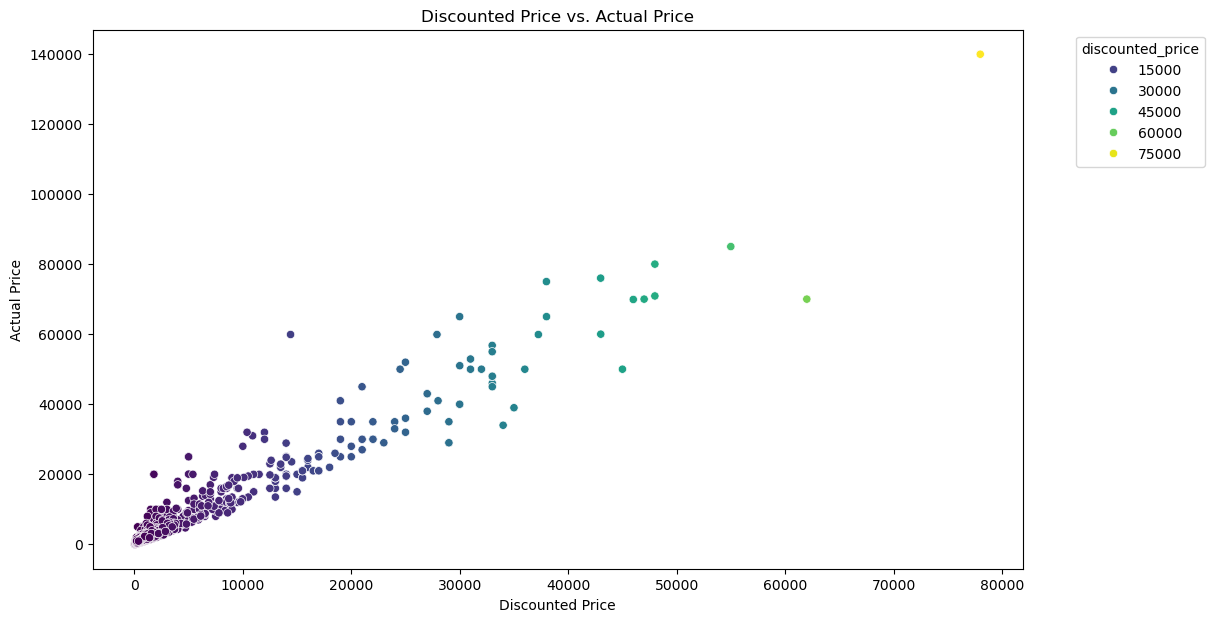

In [19]:
# Create the scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x='discounted_price', y='actual_price', data=df, hue = 'discounted_price', palette='viridis')
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.legend(title='discounted_price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights >> The discounted price increases, the actual price also tends to increase. But most of the product falls under Budget Category.

#### Q4) How does the average discount percentage vary across categories ?

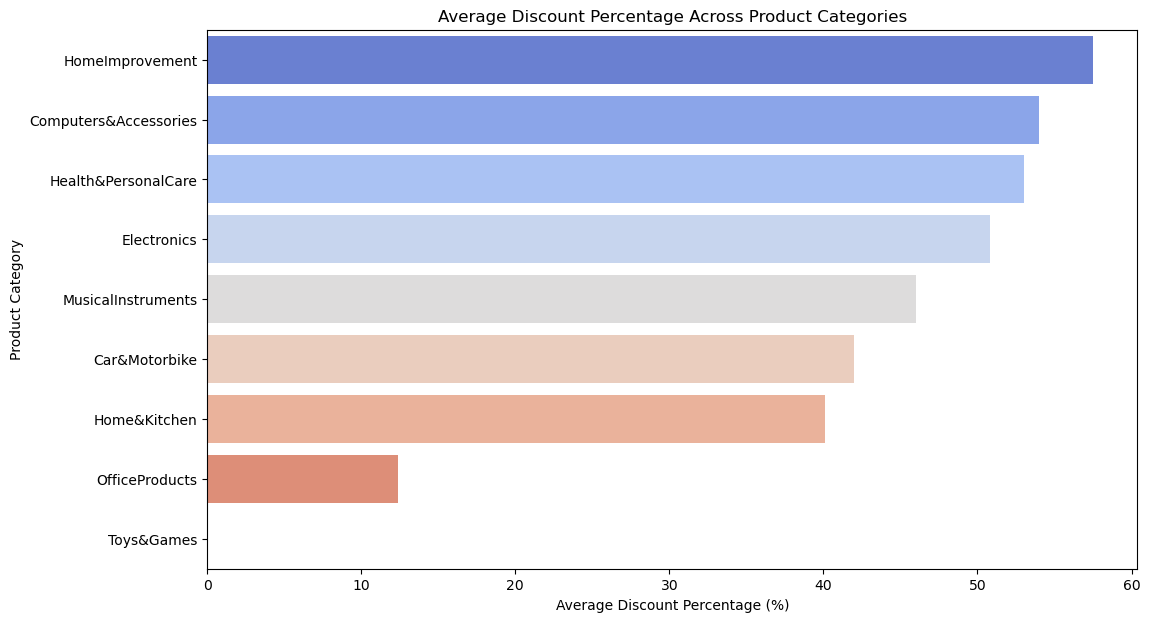

In [20]:
# Group by 'product_category' and calculate average discount percentage
avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index().head(10)

# Sort by highest average discount
avg_discount = avg_discount.sort_values(by='discount_percentage', ascending=False)

# Plotting the average discount per category
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_discount, x='discount_percentage', y='category', palette='coolwarm')
plt.title('Average Discount Percentage Across Product Categories')
plt.xlabel('Average Discount Percentage (%)')
plt.ylabel('Product Category')
plt.show()

### Insights - Max Discount is given on Home Improvement products then on computer & Accessories

#### Q5) What are the most popular product names ?

In [21]:
# Calculate average rating per product
top_rated_products = df.groupby('product_name')['rating'].mean().reset_index()

# Sort by highest average rating
top_rated_products = top_rated_products.sort_values(by='rating', ascending=False)

# Display top 10 highest-rated products
print(top_rated_products.head(10))

                                           product_name  rating
85    Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0
875   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...     5.0
1050  Syncwire LTG to USB Cable for Fast Charging Co...     5.0
746   Oratech Coffee Frother electric, milk frother ...     4.8
506   Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8
1048  Swiffer Instant Electric Water Heater Faucet T...     4.8
1241  Zuvexa USB Rechargeable Electric Foam Maker - ...     4.7
241   Campfire Spring Chef Prolix Instant Portable W...     4.7
368   FIGMENT Handheld Milk Frother Rechargeable, 3-...     4.7
1018  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...     4.7


#### Insights - Most rated product are from Electronics

#### Q6) What are the most popular product keywords ?

In [22]:
# Combine all product names into one string
all_product_names = ' '.join(df['product_name'].astype(str))

# Split into individual words and convert to lowercase
words = all_product_names.lower().split()

# Create a DataFrame from the word list
words_df = pd.DataFrame(words, columns=['word'])

# Remove common stopwords
stopwords = ['for', '(black)', 'with', 'the', 'of', 'to', 'and', 'c', 'by', 'from', '|', '&', '-']
words_df = words_df[~words_df['word'].isin(stopwords)]

# Count word frequency
word_counts = words_df['word'].value_counts()

# Display top 10 keywords
print(word_counts.head(10))

word
usb           377
cable         320
charging      219
fast          211
smart         171
type          144
tv            138
compatible    138
data          131
hd            130
Name: count, dtype: int64


#### Q7) What are the most popular product reviews ?

In [23]:
# Sort reviews based on highest ratings
if 'rating' in df.columns and 'review_title' in df.columns:
    top_rated_reviews = df.sort_values(by='rating', ascending=False)[['review_title', 'rating']].dropna().head(10)
    print(top_rated_reviews)
else:
    print("The required columns ('reviews' and 'ratings') are not available.")

                                           review_title  rating
324                                     Awesome Product     5.0
174   Good,Superb quality,Good products  nice one,Wo...     5.0
775   Very responsive and stylish mouse,Simply Aweso...     5.0
1145  Best Product,It’s expansive but it works well ...     4.8
1201  Oratech Best Coffee Frother,Great,My review ab...     4.8
1299  Loved it,Good product,Good product,It's easy t...     4.8
249   Product installation was excellent  but delive...     4.7
1388  Felt very useful 👌 but cable is short,Good in ...     4.7
1226  Little kitchen helper,An amazing product,Very ...     4.7
459   Easy to install,Best screen guard and the easi...     4.7


#### Q8) What is the correlation between discounted_price and rating ?

Correlation between Discounted Price and Ratings: 0.11


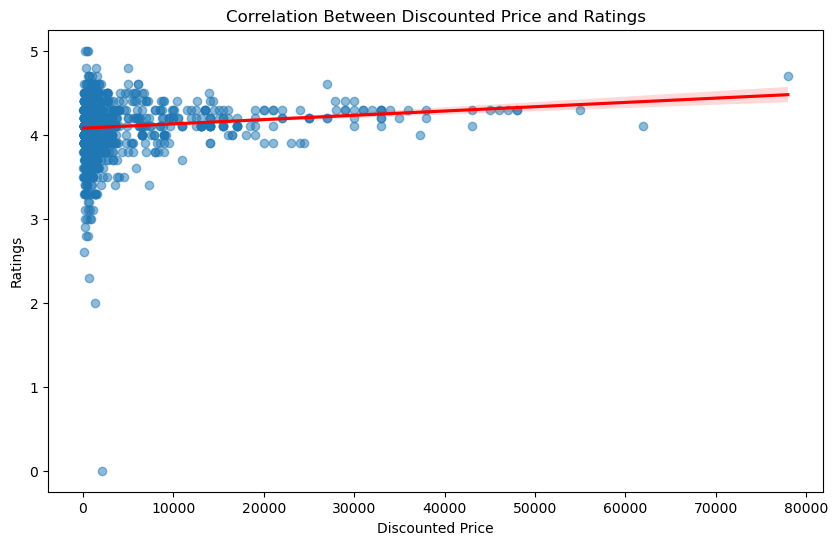

In [24]:
# Calculate the correlation
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between Discounted Price and Ratings: {correlation:.2f}")

# Plot the correlation using a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='discounted_price', y='rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation Between Discounted Price and Ratings')
plt.xlabel('Discounted Price')
plt.ylabel('Ratings')
plt.show()

### Insights - More Discount, More Rating

#### Q9) What are the Top 5 categories based on the highest ratings ?

In [25]:
# Calculate average rating per category
avg_ratings = df.groupby('category')['rating'].mean().reset_index()

# Sort by highest average rating and select top 5
top_5_categories = avg_ratings.sort_values(by='rating', ascending=False).head(5)

print(top_5_categories)

                category    rating
7         OfficeProducts  4.309677
8             Toys&Games  4.300000
5        HomeImprovement  4.250000
1  Computers&Accessories  4.154967
2            Electronics  4.081749


#### Q10) Identify any potential areas for improvement or optimization based on the data analysis.

In [26]:
# Identifying areas for improvement based on low ratings and low discounts

# Products with low ratings (<3.5) and low discount (<30%)
low_rating_discount = df[(df['rating'] < 3.5) & (df['discount_percentage'] < 30)][['product_name', 'category', 'rating', 'discount_percentage']]

# Categories with average rating < 4 and discount < 40%
category_issues = df.groupby('category').agg({'rating': 'mean', 'discount_percentage': 'mean'}).reset_index()
category_issues = category_issues[(category_issues['rating'] < 4) & (category_issues['discount_percentage'] < 40)]

low_rating_discount.head()

,product_name,category,rating,discount_percentage
921,Canon PIXMA MG2577s All-in-One Inkjet Colour P...,Computers&Accessories,3.4,10
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,Home&Kitchen,0.0,16
1374,KNYUC MART Mini Electric Handy Room Heater Com...,Home&Kitchen,3.3,22
